# Impedance Simulations in PyBaMM
Andrew Weng

8/24/2020

Purpose: use a physics model to understand the contribution to overall cell impedance during HPPC pulse charges and discharges.

In [4]:
%pip install pybamm -q # Install pybamm if not installed

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pybamm

In [2]:
import os, sys

if os.path.basename(os.getcwd()) == 'code-base':
    os.chdir('../')
sys.path.append('code-base')

import numpy as np
import pandas as pd
import glob, re, pprint, random
from datetime import datetime

from matplotlib import pyplot as plt

from src.formation import FormationCell
from src.utils import get_label_registry

import warnings
warnings.filterwarnings('ignore')

assert os.path.basename(os.getcwd()) == 'project-formation'

## Configure plot settings

In [15]:
plt.rc('font', **{'family'     : 'sans-serif',
                  'sans-serif' : ['Arial'],
                  'size': 18
                  })
plt.rc('figure', **{'autolayout' : True,
                    'figsize'    : (7, 5),
                    'facecolor'  : 'white',
                    'dpi'        : 150
                    })
plt.rc('xtick', labelsize='medium')
plt.rc('ytick', labelsize='medium')
plt.rc('axes',  labelsize='medium', grid=False)
plt.rc('axes',  titlesize='medium')
plt.rc('legend', fontsize='medium')


## Load and inspect the experimental HPPC data

In [16]:
cell_id = 1
rpt_index = 0

formation_cell = FormationCell(1)
result = formation_cell.process_diagnostic_hppc_charge_data()
raw_data = result[rpt_index]['raw_all']

In [17]:
raw_data

,[Maccor] VAR 1,[Maccor] VAR 10,[Maccor] VAR 11,[Maccor] VAR 12,[Maccor] VAR 13,[Maccor] VAR 14,[Maccor] VAR 15,[Maccor] VAR 2,[Maccor] VAR 3,[Maccor] VAR 4,...,[Maccor] Datapoint ID,[Maccor] Datapoint Time,[Maccor] Ending Status,[Maccor] Energy (Wh),[Maccor] Internal Resistance (Ω),[Maccor] Potential (V),[Maccor] State,[Maccor] Step Index,[Maccor] Step Time (s),[Maccor] Test Time (s)
2486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2487,06/27/2020 16:39:44,0,0.000011,0.0,3.008011,C,20,0.04,189724.57
2487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2488,06/27/2020 16:39:54,1,0.004016,0.0,3.057145,C,20,10.04,189734.57
2488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2489,06/27/2020 16:40:04,1,0.008054,0.0,3.076524,C,20,20.04,189744.57
2489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2490,06/27/2020 16:40:14,1,0.012115,0.0,3.092164,C,20,30.04,189754.57
2490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2491,06/27/2020 16:40:24,1,0.016194,0.0,3.105669,C,20,40.04,189764.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,41641,06/28/2020 22:03:08,1,0.000000,0.0,3.390936,R,34,260.01,295526.00
41641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,41642,06/28/2020 22:03:18,1,0.000000,0.0,3.391699,R,34,270.01,295536.00
41642,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,41643,06/28/2020 22:03:28,1,0.000000,0.0,3.392538,R,34,280.01,295546.00
41643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,41644,06/28/2020 22:03:38,1,0.000000,0.0,3.393149,R,34,290.01,295556.00


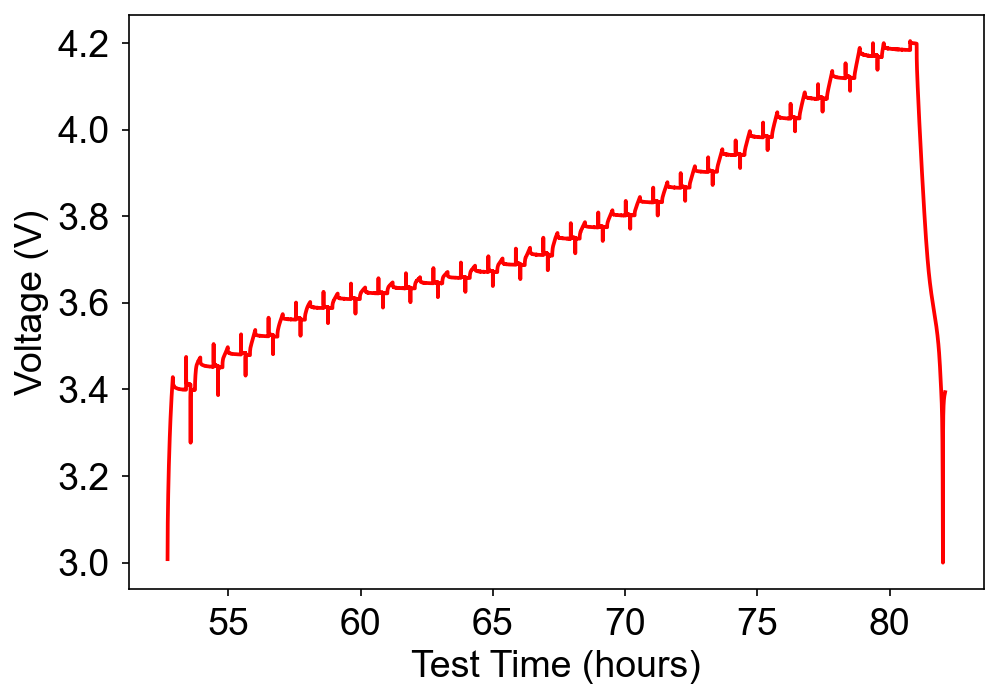

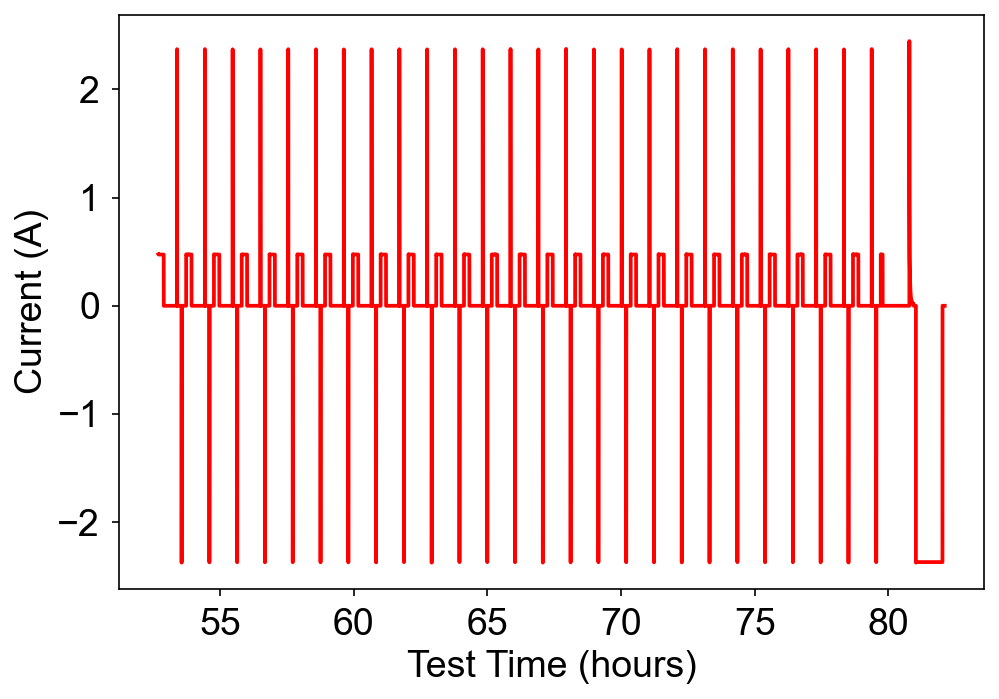

In [30]:
plt.figure()

plt.plot(raw_data['Test Time (s)'] / 3600, raw_data['Potential (V)'])
plt.xlabel('Test Time (hours)')
plt.ylabel('Voltage (V)')

plt.figure()

plt.plot(raw_data['Test Time (s)'] / 3600, raw_data['Current (A)'])
plt.xlabel('Test Time (hours)')
plt.ylabel('Current (A)')

raw_data.to_csv('output.csv')


## Configure the PyBAMM Model

In [42]:
# chemistry = pybamm.parameter_sets.Ai2020
chemistry = pybamm.parameter_sets.Mohtat2020
parameter_values = pybamm.ParameterValues(chemistry=chemistry)

model = pybamm.lithium_ion.SPMe()

experiment = pybamm.Experiment(
     [
          ("Discharge at 0.835 A for 1.57 hours",
          "Charge at 0.334 A until 4.2V", 
          "Hold at 4.2V until 50 mA"),
      ] * 4
)

sim = pybamm.Simulation(model, experiment=experiment,
                               parameter_values=parameter_values)


## Run the simulation

In [40]:
sim.solve()

## Plot the simulation results

In [41]:
sim.plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=22.608730186714233, step=0.22608730186714232…

In [28]:
sim.solution()

TypeError: 'Solution' object is not callable